# Memory One Strategies: Perfect and Limited Memory

**Imports**

In [16]:
import pandas as pd

import tqdm

import glob 

import numpy as np

In [17]:
import matplotlib.pyplot as plt

import matplotlib

import matplotlib.gridspec as gridspec

import matplotlib.colors as colors

from mpl_toolkits.axes_grid1 import make_axes_locatable

In [18]:
plt.rcParams["font.weight"] = "normal"
# plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["font.size"] = 11

plt.rcParams["font.family"] = "Arial"

## Results for Low and High values of benefit ($b$)

**Reading in the data and preparing for plotting**

In [19]:
columns = [
        "p_1",
        "p_2",
        "p_3",
        "p_4",
        "y",
        "average cooperation rate",
        "average score",
        "t",
        "frequencies"
    ]

In [20]:
expected_dfs = [pd.read_csv(f"../to_archieve/memory-one/clean_memory_one_expected_b_3.csv"), 
                pd.read_csv(f"../to_archieve/memory-one/clean_memory_one_expected_b_10.csv")]

In [21]:
last_round_dfs = [pd.read_csv(f"../to_archieve/memory-one/clean_memory_one_last_round_b_3.csv"), 
                  pd.read_csv(f"../to_archieve/memory-one/clean_memory_one_last_round_b_10.csv")]

In [22]:
for df in expected_dfs:
    df.columns = columns
    
for df in last_round_dfs:
    df.columns = columns

In [23]:
reds, blues = matplotlib.cm.get_cmap("Reds"), matplotlib.cm.get_cmap("Blues")

cmaps = [blues, reds]

In [24]:
titles = ["Perfect Payoff Memory",
          "Limited Payoff Memory"]

### Low Benefit ($b=3$)

In [25]:
coop_rates = [sum(df['average cooperation rate'] * (df['frequencies'] / 10 ** 7))  for df in [expected_dfs[0],
                                                                                              last_round_dfs[0]]]

In [26]:
most_abundant_low_b = [df[df['frequencies'] == df['frequencies'].max()]  for df in [expected_dfs[0],
                                                                                    last_round_dfs[0]]]

In [27]:
xs, heights_perfect, heights_limited = [], [], []

for j, column in enumerate(["p_1", "p_2", "p_3", "p_4", "y"]):

    heights_perfect.append(most_abundant_low_b[0][column].iloc[0])
    heights_limited.append(most_abundant_low_b[1][column].iloc[0])
    xs.append(j) 

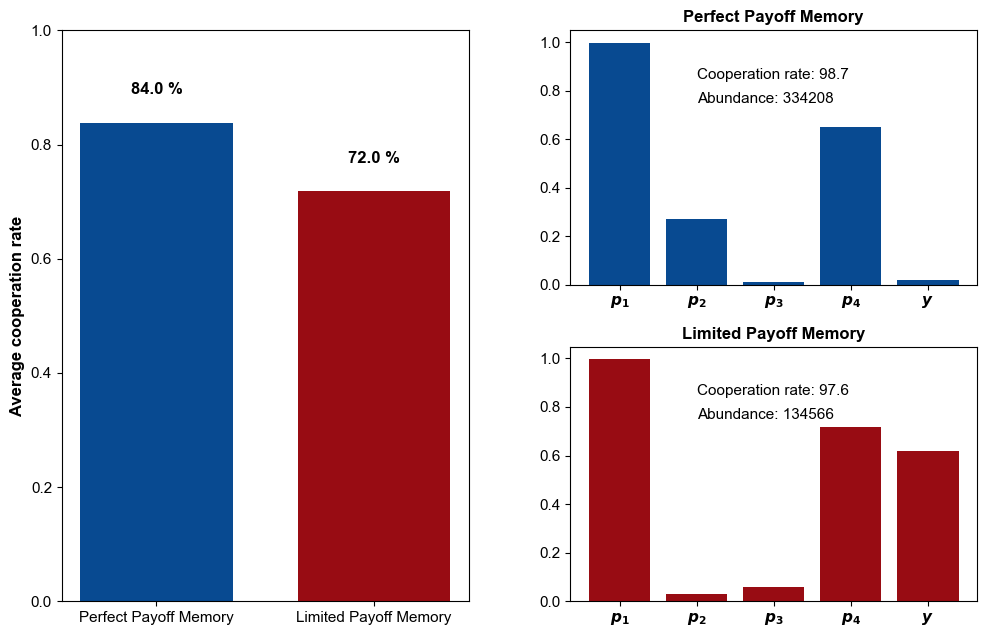

In [28]:
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10, 6.5))


# Most abundant strategies

for i, height in enumerate([heights_perfect, heights_limited]):

    axes = plt.subplot(gs[i, 1])

    axes.set_title(fr"{titles[i]}", weight="bold", fontsize=12);
        
    axes.bar(xs, height, color=cmaps[i](0.9), zorder=2)

    axes.xaxis.set_ticks([0, 1, 2, 3, 4])

    row = most_abundant_low_b[i]
    axes.text(1, .85, f"""Cooperation rate: {round(row["average cooperation rate"].iloc[0], 3) * 100}""")
    axes.text(1, .75, f"""Abundance: {int(row["frequencies"].iloc[0])}""")
    

    axes.set_xticklabels(["$p_1$", "$p_2$", "$p_3$", "$p_4$", "$y$"]);

# Cooperation Rates

axes = plt.subplot(gs[:, 0]) # row 1, span all columns

axes.bar([1, 2], coop_rates, width=.7,  color=[cmaps[0](0.9), cmaps[1](0.9)])

axes.set_xticks([1, 2]);
axes.set_xticklabels(titles);

axes.set_ylim(0, 1);

axes.set_ylabel("Average cooperation rate", weight="bold", fontsize=12);

for j, pos in enumerate([1, 2]):
    axes.text(pos,
              coop_rates[j] + 0.05,
              f"{round(coop_rates[j] * 100 , 0)} %",
              horizontalalignment='center',
              color="black",
              weight='bold',
              fontsize=12
      )

fig.tight_layout();

plt.subplots_adjust(wspace=.25,)

plt.savefig("../paper/static/memory_one_results_low_benefit.pdf", bbox_inches='tight')

### High Benefit ($b=10$)

In [29]:
coop_rates = [sum(df['average cooperation rate'] * (df['frequencies'] / 10 ** 7))  for df in [expected_dfs[1],
                                                                                              last_round_dfs[1]]]

In [30]:
most_abundant_high_b = [df[df['frequencies'] == df['frequencies'].max()]  for df in [expected_dfs[1], 
                                                                                    last_round_dfs[1]]]

In [31]:
xs, heights_perfect, heights_limited = [], [], []

for j, column in enumerate(["p_1", "p_2", "p_3", "p_4", "y"]):

    heights_perfect.append(most_abundant_high_b[0][column].iloc[0])
    heights_limited.append(most_abundant_high_b[1][column].iloc[0])
    xs.append(j) 

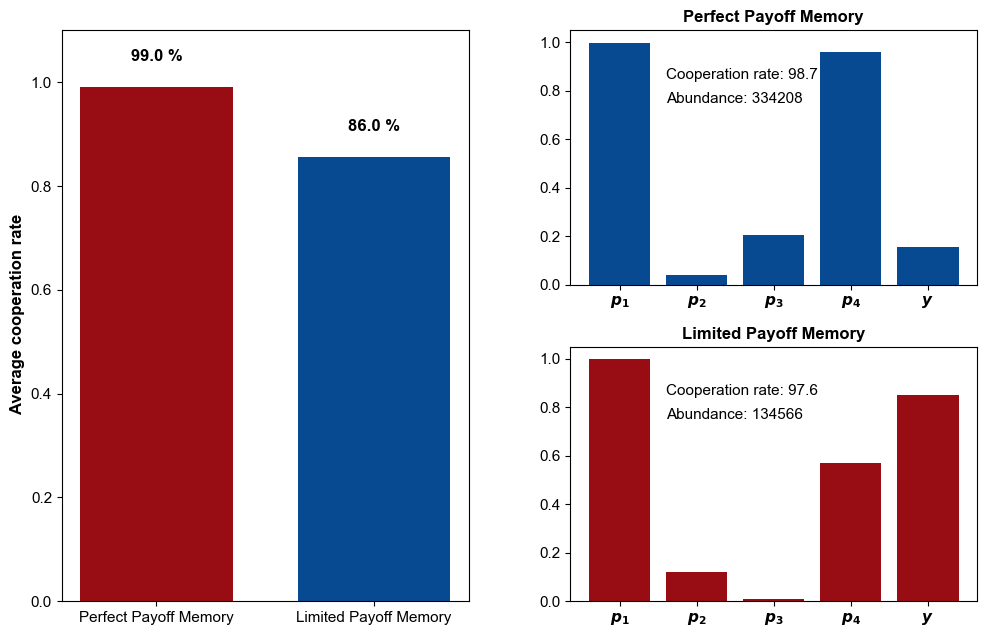

In [32]:
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10, 6.5))


# Most abundant strategies

for i, height in enumerate([heights_perfect, heights_limited]):

    axes = plt.subplot(gs[i, 1])

    axes.set_title(fr"{titles[i]}", weight="bold", fontsize=12);
        
    axes.bar(xs, height, color=cmaps[i](0.9), zorder=2)

    axes.xaxis.set_ticks([0, 1, 2, 3, 4])
    axes.set_xticklabels(["$p_1$", "$p_2$", "$p_3$", "$p_4$", "$y$"]);

    
    row = most_abundant_low_b[i]
    axes.text(.6, .85, f"""Cooperation rate: {round(row["average cooperation rate"].iloc[0], 3) * 100}""")
    axes.text(.6, .75, f"""Abundance: {int(row["frequencies"].iloc[0])}""")

# Cooperation Rates

axes = plt.subplot(gs[:, 0]) # row 1, span all columns

axes.bar([1, 2], coop_rates, width=.7,  color=[cmaps[1](0.9), cmaps[0](0.9)])

axes.set_xticks([1, 2]);
axes.set_xticklabels(titles);

axes.set_ylim(0, 1.1);

axes.set_ylabel(" Average cooperation rate", weight="bold", fontsize=12);

for j, pos in enumerate([1, 2]):
    axes.text(pos,
              coop_rates[j] + 0.05,
              f"{round(coop_rates[j] * 100 , 0)} %",
              horizontalalignment='center',
              color="black",
              weight='bold',
              fontsize=12
      )

fig.tight_layout();

plt.subplots_adjust(wspace=.25,)

plt.savefig("../paper/static/memory_one_results_high_benefit.pdf", bbox_inches='tight')

## Results over different values of $b$ and $\beta$

### Benefit analysis ($b$)

In [33]:
import re

start = 'b_'

In [34]:
csv_files_perfect = [f'../to_archieve/memory-one/clean_memory_one_expected_b_{b}.csv' for b in range(2, 11)]

csv_files_limited = [f'../to_archieve/memory-one/clean_memory_one_last_round_b_{b}.csv' for b in range(2, 11)]

In [35]:
end = '.csv'
dfs_perfect = []

for file in csv_files_perfect:
    df = pd.read_csv(file)
    df['b'] = result = re.search('%s(.*)%s' % (start, end), file).group(1)
    
    dfs_perfect.append(df)

In [36]:
end = '.csv'
dfs_limited = []

for file in csv_files_limited:
    df = pd.read_csv(file)
    df['b'] = result = re.search('%s(.*)%s' % (start, end), file).group(1)
    
    dfs_limited.append(df)

In [37]:
cooperation_rates_limited_b = []
cooperation_rates_perfect_b = []

for perfect, limited in zip(dfs_perfect, dfs_limited):
    
    cooperation_rates_perfect_b.append(
        sum(perfect['average cooperation rate'] * (perfect['frequencies'] / sum(perfect['frequencies'])))
    )
    cooperation_rates_limited_b.append(
        sum(limited['average cooperation rate'] * (limited['frequencies'] / sum(limited['frequencies'])))
    )

In [38]:
%%capture

generosity_rates_limited_b = []
generosity_rates_perfect_b = []

for perfect, limited in zip(dfs_perfect, dfs_limited):


    _, bins, _ = plt.hist(perfect['p_1'], bins=19);
    generosity_rates_perfect_b.append(np.mean(perfect[perfect['p_1'] >= bins[-2]][['p_2', 'p_4']].unstack()))
    
    _, bins, _ = plt.hist(limited['p_1'], bins=19);
    generosity_rates_limited_b.append(np.mean(limited[limited['p_1'] >= bins[-2]][['p_2', 'p_4']].unstack()))

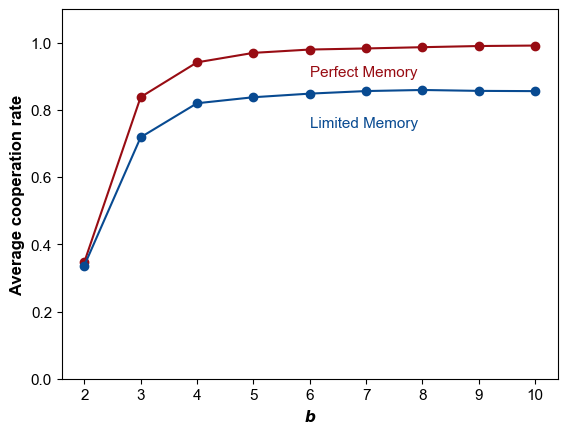

In [39]:
fig, axes = plt.subplots()

axes.plot(range(2, 11), cooperation_rates_perfect_b, "-o", color=cmaps[1](0.9));
axes.plot(range(2, 11), cooperation_rates_limited_b, "-o", color=cmaps[0](.9));

axes.set_ylabel('Average cooperation rate', weight="bold", fontsize=12);
axes.set_xlabel('$b$', weight="bold");
axes.set_ylim(0, 1.1);

axes.text(6, .9, "Perfect Memory", fontsize=11, color=cmaps[1](0.9))
axes.text(6, .75, "Limited Memory", fontsize=11, color=cmaps[0](.9));

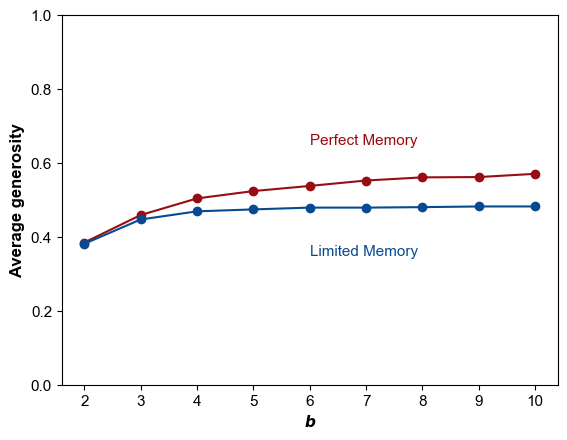

In [40]:
fig, axes = plt.subplots()

axes.plot(range(2, 11), generosity_rates_perfect_b, "-o", color=cmaps[1](0.9));
axes.plot(range(2, 11), generosity_rates_limited_b, "-o", color=cmaps[0](.9));


axes.set_ylabel('Average generosity', weight="bold", fontsize=12);
axes.set_xlabel('$b$', weight="bold");
axes.set_ylim(0, 1);

axes.text(6, .65, "Perfect Memory", fontsize=11, color=cmaps[1](0.9))
axes.text(6, .35, "Limited Memory", fontsize=11, color=cmaps[0](.9));


### Strength of selection analysis ($\beta$)

In [41]:
betas = [0.01, 0.1, 1, 10, 100]
start = 'beta_'

In [42]:
csv_files_perfect = [f'../to_archieve/memory-one/clean_memory_one_expected_beta_{beta}.csv' for beta in betas]

csv_files_limited = [f'../to_archieve/memory-one/clean_memory_one_last_round_beta_{beta}.csv' for beta in betas]

In [43]:
end = ".csv"

dfs_perfect = []

for file in csv_files_perfect:
    df = pd.read_csv(file)
    df['b'] = result = re.search('%s(.*)%s' % (start, end), file).group(1)
    
    dfs_perfect.append(df)

In [44]:
dfs_limited = []

for file in csv_files_limited:
    df = pd.read_csv(file)
    df['b'] = result = re.search('%s(.*)%s' % (start, end), file).group(1)
    
    dfs_limited.append(df)

In [45]:
cooperation_rates_limited_beta = []
cooperation_rates_perfect_beta = []

for perfect, limited in zip(dfs_perfect, dfs_limited):
    
    cooperation_rates_perfect_beta.append(
        sum(perfect['average cooperation rate'] * (perfect['frequencies'] / sum(perfect['frequencies'])))
    )
    cooperation_rates_limited_beta.append(
        sum(limited['average cooperation rate'] * (limited['frequencies'] / sum(limited['frequencies'])))
    )

In [46]:
%%capture

generosity_rates_perfect_beta = []
generosity_rates_limited_beta = []

for perfect, limited in zip(dfs_perfect, dfs_limited):


    _, bins, _ = plt.hist(perfect['p_1'], bins=19);
    generosity_rates_perfect_beta.append(np.mean(perfect[perfect['p_1'] >= bins[-2]][['p_2', 'p_4']].unstack()))
    
    _, bins, _ = plt.hist(limited['p_1'], bins=19);
    generosity_rates_limited_beta.append(np.mean(limited[limited['p_1'] >= bins[-2]][['p_2', 'p_4']].unstack()))
    

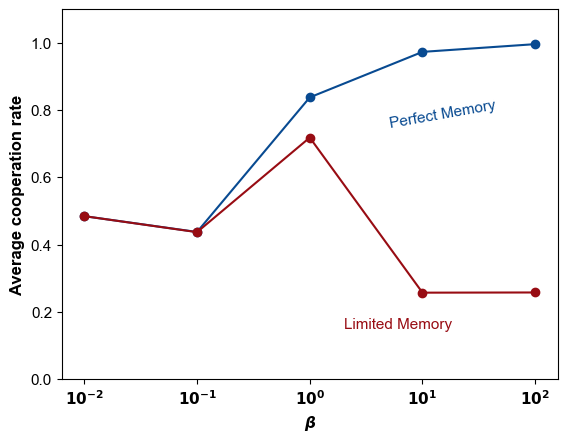

In [47]:
fig, axes = plt.subplots()

axes.plot(range(1, 6), cooperation_rates_perfect_beta, "-o", color=blues(0.9));
axes.plot(range(1, 6), cooperation_rates_limited_beta, "-o", color=reds(0.9));

axes.set_ylabel('Average cooperation rate', weight="bold", fontsize=12);
axes.set_xlabel(r'$\beta$', weight="bold");

axes.set_xticks([1, 2, 3, 4, 5]);
axes.set_xticklabels([r"$10^{-2}$", 
                      r"$10^{-1}$", 
                      r"$10^{0}$",
                      r"$10^{1}$", 
                      r"$10^{2}$"]);

axes.set_ylim(0, 1.1);
axes.text(3.7, .75, "Perfect Memory", fontsize=11, color=blues(.9), rotation=10)
axes.text(3.3, .15, "Limited Memory", fontsize=11, color=reds(.9), rotation=0);

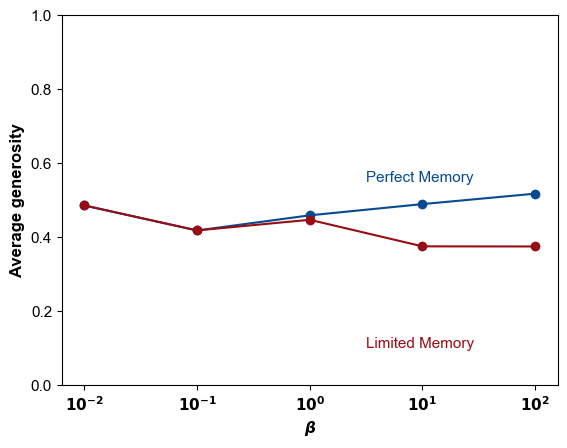

In [48]:
fig, axes = plt.subplots()

axes.plot(range(1, 6), generosity_rates_perfect_beta, "-o", color=blues(0.9), label="expected");
axes.plot(range(1, 6), generosity_rates_limited_beta, "-o", color=reds(.9), label="stochastic");

axes.set_ylabel('Average generosity', weight="bold", fontsize=12);
axes.set_xlabel(r'$\beta$', weight="bold");
axes.set_ylim(0, 1);

axes.text(3.5, .55, "Perfect Memory", fontsize=11, color=blues(.9))
axes.text(3.5, .1, "Limited Memory", fontsize=11, color=reds(.9))

axes.set_xticks([1, 2, 3, 4, 5]);
axes.set_xticklabels([r"$10^{-2}$", 
                      r"$10^{-1}$", 
                      r"$10^{0}$",
                      r"$10^{1}$", 
                      r"$10^{2}$"]);


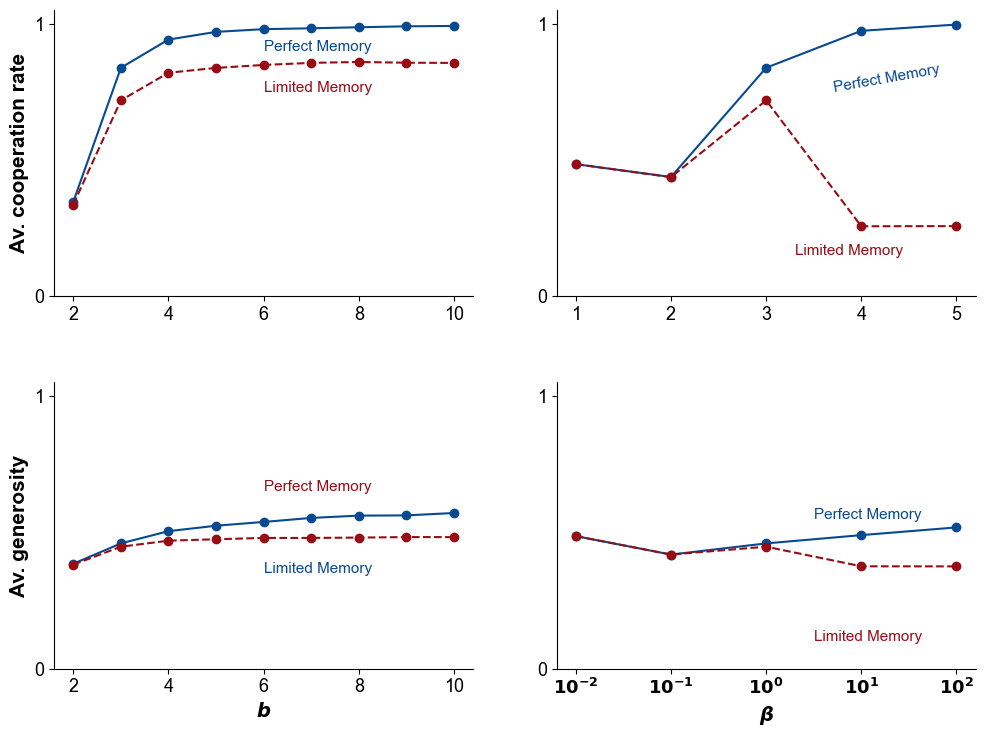

In [49]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7.5))

# Cooperation Rates For b

axes[0, 0].plot(range(2, 11), cooperation_rates_perfect_b, "-o", color=blues(0.9));
axes[0, 0].plot(range(2, 11), cooperation_rates_limited_b, "--o", color=reds(.9));

axes[0, 0].set_ylabel('Av. cooperation rate', weight="bold", fontsize=15);


axes[0, 0].text(6, .9, "Perfect Memory", fontsize=11, color=blues(.9))
axes[0, 0].text(6, .75, "Limited Memory", fontsize=11, color=reds(.9));

# Generosity Rates For b

axes[1, 0].plot(range(2, 11), generosity_rates_perfect_b, "-o", color=blues(0.9));
axes[1, 0].plot(range(2, 11), generosity_rates_limited_b, "--o", color=reds(.9));
axes[1, 0].set_xlabel("$b$", weight="bold", fontsize=14);
axes[1, 0].set_ylabel('Av. generosity', weight="bold", fontsize=15);

axes[1, 0].text(6, .65, "Perfect Memory", fontsize=11, color=cmaps[1](0.9))
axes[1, 0].text(6, .35, "Limited Memory", fontsize=11, color=cmaps[0](.9));


# Cooperation Rates For beta

axes[0, 1].plot(range(1, 6), cooperation_rates_perfect_beta, "-o", color=blues(0.9));
axes[0, 1].plot(range(1, 6), cooperation_rates_limited_beta, "--o", color=reds(0.9));
axes[0, 1].set_xticks([1, 2, 3, 4, 5]);

axes[0, 1].text(3.7, .75, "Perfect Memory", fontsize=11, color=blues(.9), rotation=10)
axes[0, 1].text(3.3, .15, "Limited Memory", fontsize=11, color=reds(.9), rotation=0);

# Generosity Rates For beta

axes[(1, 1)].plot(range(1, 6), generosity_rates_perfect_beta, "-o", color=blues(0.9));
axes[(1, 1)].plot(range(1, 6), generosity_rates_limited_beta, "--o", color=reds(.9));
axes[(1, 1)].set_xlabel(r'$\beta$', weight="bold", fontsize=14);

axes[(1, 1)].text(3.5, .55, "Perfect Memory", fontsize=11, color=blues(.9))
axes[(1, 1)].text(3.5, .1, "Limited Memory", fontsize=11, color=reds(.9))


axes[(1, 1)].set_xticks([1, 2, 3, 4, 5]);
axes[(1, 1)].set_xticklabels([r"$10^{-2}$", 
                      r"$10^{-1}$", 
                      r"$10^{0}$",
                      r"$10^{1}$", 
                      r"$10^{2}$"]);

for i in [(0, 0), (0, 1), (1, 0), (1, 1)]:
    axes[i].tick_params(axis='both', which='major', labelsize=13)
    axes[i].set_ylim(0, 1.05);
    axes[i].set_yticks([0, 1])
    for ax in [axes[i].spines["right"], axes[i].spines["top"]]:
        ax.set_visible(False);
        
    
        
plt.tight_layout();

plt.subplots_adjust(wspace=.2, hspace=.3)

plt.savefig("../paper/static/cooperation_rate_over_b_and_beta_memory_one.pdf", bbox_inches='tight')